In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [59]:
d1=pd.read_csv('titanic_train.csv')

In [60]:
d1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
d1.shape

(891, 12)

In [62]:
d1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [63]:
d1.drop('PassengerId',axis=1,inplace=True)
d1.drop('Parch',axis=1,inplace=True)
d1.drop('Name',axis=1,inplace=True)
d1.drop('Ticket',axis=1,inplace=True)
d1.drop('Cabin',axis=1,inplace=True)

In [64]:
d1['Age']=d1['Age'].fillna(d1['Age'].median())

In [65]:
print(d1["Embarked"].unique())

['S' 'C' 'Q' nan]


In [66]:
d1["Embarked"]=d1["Embarked"].fillna("S")

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
le=LabelEncoder()
list1=["Sex","Embarked"]
for val in list1:
    d1[val]=le.fit_transform(d1[val].astype(str))

In [69]:
d1.describe()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.019697,1.102743,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,512.329200,2.000000


In [70]:
#here mean for survived,age,sibSp,fare are greater than median(50%),that means they are right skewed.
#there are great difference between 75% and max for age,sibsp fare.Thus we can conclude that there are ouliers in these dataset.

In [71]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 41.9 KB


In [72]:
d1.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Fare        248
Embarked      3
dtype: int64

In [73]:
d1.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [74]:
#there are total 891 passengers .From that only 342 passengers survived and 549 didnt survive

In [75]:
d1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Fare        0
Embarked    0
dtype: int64

In [76]:
d1.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,1,22.0,1,7.2500,2
1,1,1,0,38.0,1,71.2833,0
2,1,3,0,26.0,0,7.9250,2
3,1,1,0,35.0,1,53.1000,2
4,0,3,1,35.0,0,8.0500,2


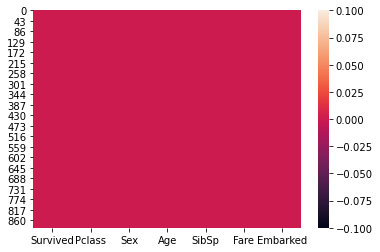

In [77]:
sns.heatmap(d1.isnull())

In [78]:
dcor=d1.corr()
dcor

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.182333,0.108262
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,0.096688,-0.018754
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.159651,0.068230
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.018754,0.068230,-0.224719,1.000000


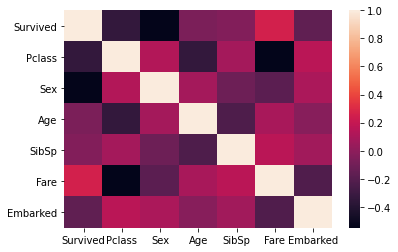

In [79]:
sns.heatmap(dcor)

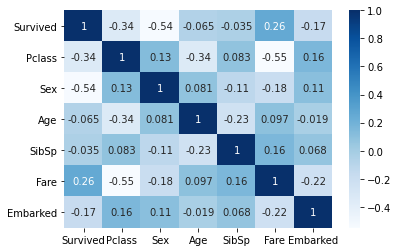

In [80]:
plt.figure(figsize=(6,4))
sns.heatmap(dcor,cmap='Blues',annot=True)

In [81]:
#survived has highly negative relation with sex.and also it has a small positive relation with the fare

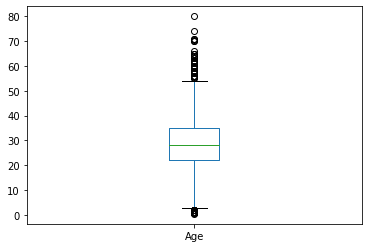

In [82]:
d1['Age'].plot.box()

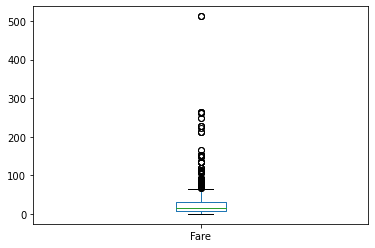

In [83]:
d1['Fare'].plot.box()

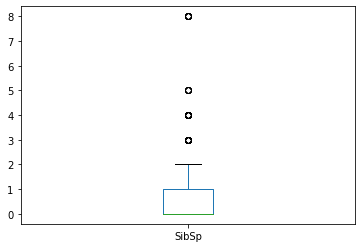

In [84]:
d1['SibSp'].plot.box()

In [85]:
collist=d1.columns.values
ncol=12
nrows=7

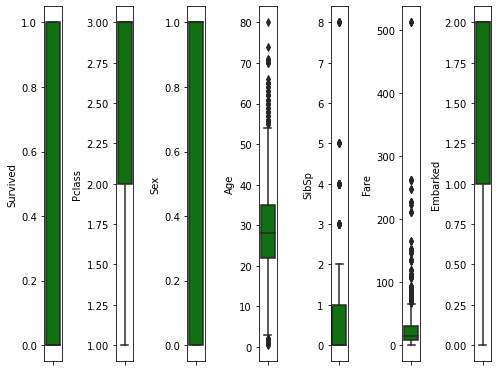

In [86]:
plt.figure(figsize=(ncol,3*ncol))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(d1[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [87]:
d1.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.510245
SibSp       3.695352
Fare        4.787317
Embarked   -1.264823
dtype: float64

In [88]:
#here we can see that sibsp,fare and embarked are highly skewed datas. pclass and  sex are slightly skewed datas

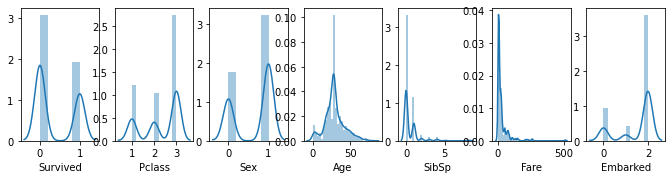

In [89]:
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(d1[collist[i]])

In [90]:
from scipy.stats import zscore
import numpy as np

z=np.abs(zscore(d1))
z

array([[0.78927234, 0.82737724, 0.73769513, ..., 0.43279337, 0.50244517,
        0.58595414],
       [1.2669898 , 1.56610693, 1.35557354, ..., 0.43279337, 0.78684529,
        1.9423032 ],
       [1.2669898 , 0.82737724, 1.35557354, ..., 0.4745452 , 0.48885426,
        0.58595414],
       ...,
       [0.78927234, 0.82737724, 1.35557354, ..., 0.43279337, 0.17626324,
        0.58595414],
       [1.2669898 , 1.56610693, 0.73769513, ..., 0.4745452 , 0.04438104,
        1.9423032 ],
       [0.78927234, 0.82737724, 0.73769513, ..., 0.4745452 , 0.49237783,
        0.67817453]])

In [91]:
threshold=3
print(np.where(z>3))

(array([ 16,  27,  50,  59,  68,  71,  88,  96, 116, 118, 119, 159, 164,
       171, 180, 182, 201, 233, 258, 261, 266, 278, 299, 311, 324, 341,
       377, 380, 386, 438, 480, 493, 527, 541, 542, 557, 630, 672, 679,
       683, 686, 689, 700, 716, 730, 737, 742, 745, 779, 787, 792, 813,
       824, 846, 850, 851, 863], dtype=int64), array([4, 5, 4, 4, 4, 4, 5, 3, 3, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4,
       5, 5, 4, 5, 5, 5, 4, 5, 4, 3, 5, 4, 4, 5, 3, 3, 5, 4, 4, 5, 5, 5,
       5, 5, 5, 3, 5, 4, 4, 4, 4, 4, 4, 3, 4], dtype=int64))


In [92]:
z[16][3]

2.1027333275006983

In [93]:
d1_new=d1[(z<3).all(axis=1)]

In [94]:
d1_new

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,1,22.0,1,7.2500,2
1,1,1,0,38.0,1,71.2833,0
2,1,3,0,26.0,0,7.9250,2
3,1,1,0,35.0,1,53.1000,2
4,0,3,1,35.0,0,8.0500,2
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,13.0000,2
887,1,1,0,19.0,0,30.0000,2
888,0,3,0,28.0,1,23.4500,2
889,1,1,1,26.0,0,30.0000,0


In [95]:
d1_new.shape

(834, 7)

In [96]:
d1.shape

(891, 7)

In [97]:
#57 rows are deleted due to outliers

In [98]:
import sklearn
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [99]:
x=d1_new.iloc[:,1:]
x

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3,1,22.0,1,7.2500,2
1,1,0,38.0,1,71.2833,0
2,3,0,26.0,0,7.9250,2
3,1,0,35.0,1,53.1000,2
4,3,1,35.0,0,8.0500,2
...,...,...,...,...,...,...
886,2,1,27.0,0,13.0000,2
887,1,0,19.0,0,30.0000,2
888,3,0,28.0,1,23.4500,2
889,1,1,26.0,0,30.0000,0


In [100]:
y=d1_new.iloc[:,0]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 834, dtype: int64

In [101]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.82561094,  0.73399277, -0.62214888,  1.03748215, -0.63078541,
         0.57990469],
       [-1.60317046, -1.36241124,  0.69235214,  1.03748215,  1.53479307,
        -1.96557169],
       [ 0.82561094, -1.36241124, -0.29352363, -0.57380298, -0.6079572 ,
         0.57990469],
       ...,
       [ 0.82561094, -1.36241124, -0.129211  ,  1.03748215, -0.08290843,
         0.57990469],
       [-1.60317046,  0.73399277, -0.29352363, -0.57380298,  0.13860974,
        -1.96557169],
       [ 0.82561094,  0.73399277,  0.19941426, -0.57380298, -0.61387563,
        -0.6928335 ]])

In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=52)

In [103]:
x_train.shape

(625, 6)

In [104]:
x_test.shape

(209, 6)

In [105]:
y_train.shape

(625,)

In [106]:
y_test.shape

(209,)

In [107]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [108]:
pred=lg.predict (x_test)
print(pred)

[0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1
 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0
 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0
 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0]


In [109]:
print('accuracy_score:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score: 0.8229665071770335
[[115  16]
 [ 21  57]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       131
           1       0.78      0.73      0.75        78

    accuracy                           0.82       209
   macro avg       0.81      0.80      0.81       209
weighted avg       0.82      0.82      0.82       209



In [110]:
from sklearn.model_selection import cross_val_score
cross_val_score(lg,x,y,cv=5).mean()

0.7913859028930093

In [111]:
import joblib
joblib.dump(lg,'lg_titanic.pkl')

['lg_titanic.pkl']